In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
ex1data1_upload = files.upload()

Saving ex1data1.txt to ex1data1.txt


In [118]:
import io
ex1data1 = pd.read_csv(io.BytesIO(ex1data1_upload['ex1data1.txt']), header=None, names=['Population', 'Profit'])

In [119]:
ex1data1

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [120]:
X = ex1data1['Population']
y = ex1data1['Profit']

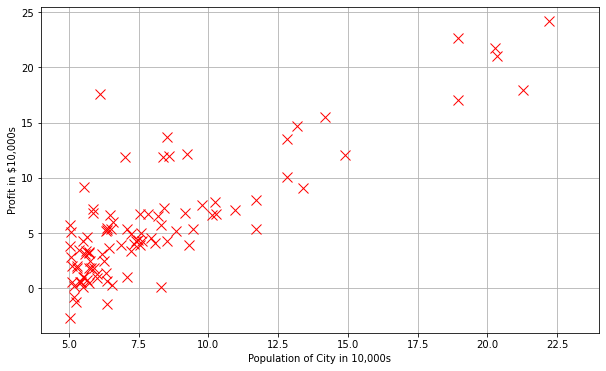

In [121]:
plt.figure(figsize=(10,6))
plt.plot(X, y, 'rx', markersize=10)
plt.xlim(4,24)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

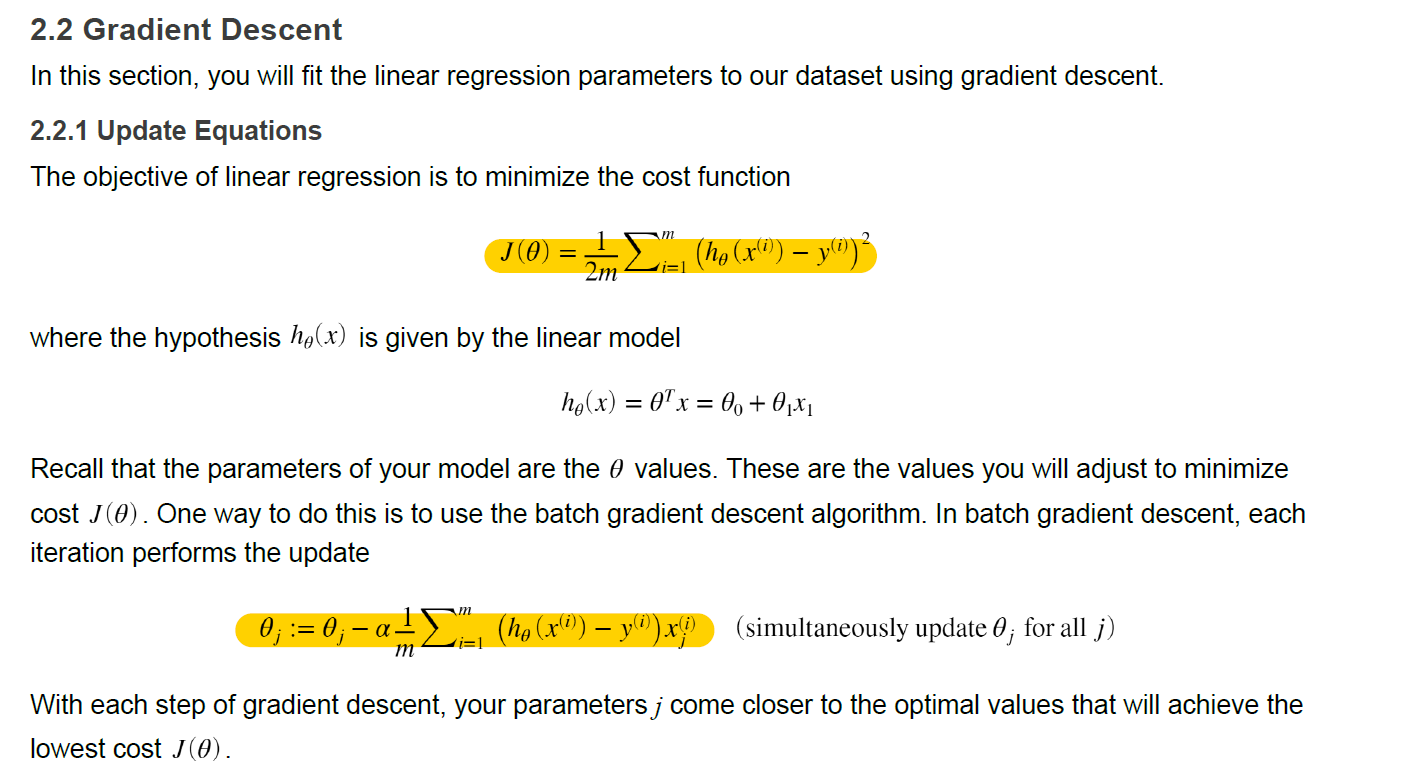

In [122]:
X = np.c_[np.ones(X.shape[0]), X]

In [123]:
X.shape

(97, 2)

In [124]:
theta = np.zeros(X.shape[1])

In [125]:
def computeCost(X, y, theta):
  m = y.size
  J = 0
  h_theta_X_minusY = np.dot(X, theta) - y # (97, 2) * (2, 1) - (97, 1)
  square_sum = np.dot(h_theta_X_minusY.T, h_theta_X_minusY)
  J = 1/(2*m) * square_sum
  return J

In [126]:
computeCost(X, y, theta)

32.072733877455676

In [127]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
  m = y.size
  J_history = np.zeros(num_iters)

  for i in np.arange(num_iters):
    h = np.dot(X, theta) # (97, 2) * (2, 1) = (97, 1)
    theta = theta - alpha * 1/m * np.dot(X.T, (h-y))
    J_history[i] = computeCost(X, y, theta)
  return (theta, J_history)


theta:  [-3.63029144  1.16636235]


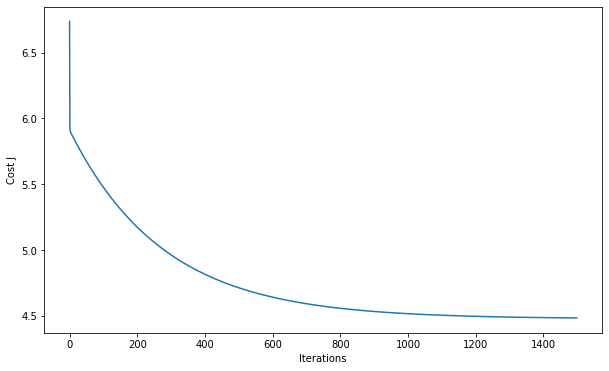

In [128]:
theta = np.zeros(X.shape[1])
theta, Cost_J = gradientDescent(X, y, theta)
print('theta: ',theta.ravel())
plt.figure(figsize=(10,6))
plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

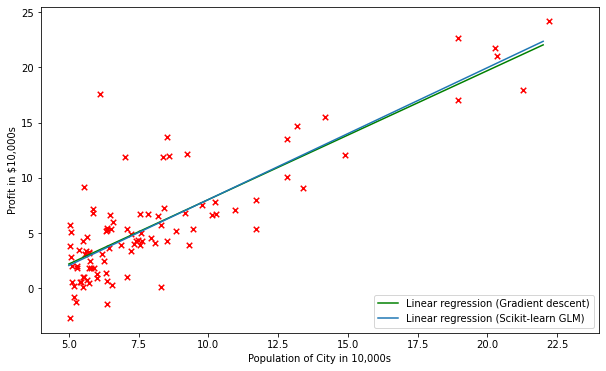

In [129]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx, yy, label='Linear regression (Gradient descent)', c='g')

# Compare with Scikit-learn Linear regression 
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [68]:
from google.colab import files
ex1data2_upload = files.upload()


Saving ex1data2.txt to ex1data2.txt


In [130]:
import io
ex1data2 = pd.read_csv(io.BytesIO(ex1data2_upload['ex1data2.txt']), header=None, names=['Size', 'Bedrooms', 'Price'])

In [131]:
# feature Normalize
ex1data2 = (ex1data2 - ex1data2.mean()) / ex1data2.std()

In [132]:
ex1data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [133]:
# add bias term
ex1data2.insert(0, 'Ones', 1)
nb_cols = ex1data2.shape[1]

# Set training data and label
X2 = ex1data2.iloc[:, 0 : nb_cols - 1]
y2 = ex1data2.iloc[:, nb_cols - 1 : nb_cols]

X2.shape, y2.shape

((47, 3), (47, 1))

In [134]:
theta2 = np.zeros(X2.shape[1])
theta2 = theta2.reshape(X2.shape[1], 1)

theta2_final, Cost2_J = gradientDescent(X2, y2, theta2)

In [135]:
theta2_final

array([[-1.10815612e-16],
       [ 8.84042349e-01],
       [-5.24551809e-02]])

In [136]:
Cost2_J

array([0.4805491 , 0.47198588, 0.46366462, ..., 0.13068671, 0.13068671,
       0.13068671])

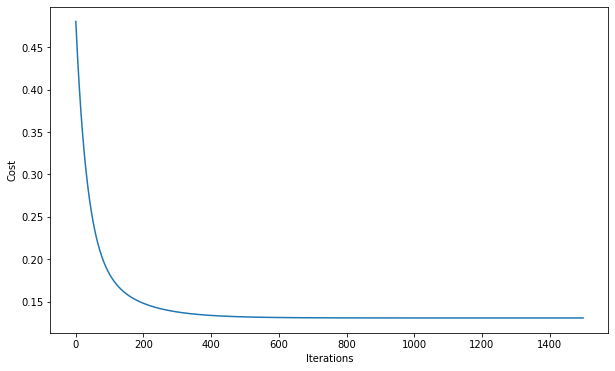

In [138]:
plt.figure(figsize=(10,6))
plt.plot(Cost2_J)
plt.ylabel('Cost')
plt.xlabel('Iterations');

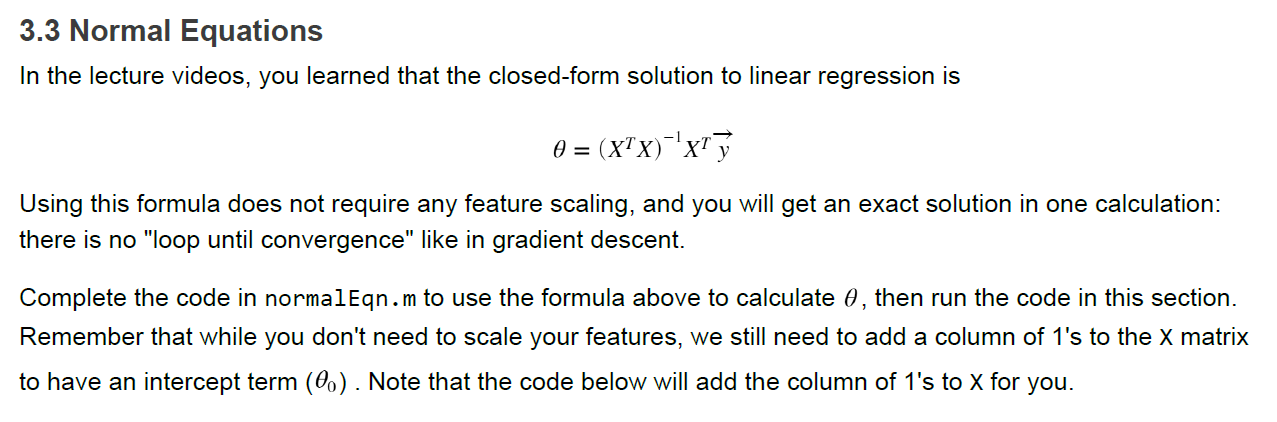

In [139]:
def normalEqn(X, y):
  inv_product = np.linalg.inv(np.dot(X.T, X))
  theta = np.dot(inv_product, X.T) @ y
  return theta

In [140]:
theta_normal = normalEqn(X, y)
theta_normal

array([-3.89578088,  1.19303364])

compared to the theta from gradient descent, theta = [-3.63029144  1.16636235]